Problem Statement: Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends

Guidelines: • Use pandas to accumulate data• Use plotly (visualization library) to create interactive visualizations • Use Facebook prophet library to make time series models • Visualize the prediction by combining these technologies

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings

%matplotlib inline

In [114]:
data = pd.read_csv("covid_19_clean_complete.csv",parse_dates=['Date'])

In [115]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [116]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [118]:
#rename column
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active','WHO Region':'WHO_Region'},inplace=True)

In [119]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO_Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [120]:
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']

In [121]:
# Country having most active case in particular time


In [122]:
recent_date = data[data['date']==data['date'].max()]

In [123]:
recent_date

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO_Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [124]:
country_wise = recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().reset_index()

<ipython-input-124-f65cfc27747a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country_wise = recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().reset_index()


In [125]:
country_wise

,country,confirmed,active,deaths,recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242
...,...,...,...,...,...
182,West Bank and Gaza,10621,6791,78,3752
183,Western Sahara,10,1,1,8
184,Yemen,1691,375,483,833
185,Zambia,4552,1597,140,2815


In [126]:
import datetime

In [127]:
data['month'] = data['date'].dt.month
data['year']=data['date'].dt.to_period('Y')

In [128]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO_Region,month,year
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020


In [129]:
data['year_month'] = data['year'].astype(str)+ "-" + data['month'].astype(str)

In [130]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO_Region,month,year,year_month
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020,2020-1
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,1,2020,2020-1
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,1,2020,2020-1
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,1,2020,2020-1
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,1,2020,2020-1


In [131]:
month_wise = data.groupby('year_month')['confirmed','active','deaths','recovered'].sum().reset_index()

<ipython-input-131-6b309b0e7b28>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_wise = data.groupby('year_month')['confirmed','active','deaths','recovered'].sum().reset_index()


In [132]:
month_wise

,year_month,confirmed,active,deaths,recovered
0,2020-1,38534,36807,889,838
1,2020-2,1663437,1252893,46875,363669
2,2020-3,9002815,5960842,397601,2644372
3,2020-4,63391662,43136428,4311214,15944020
4,2020-5,144990399,82503957,9609604,52876838
5,2020-6,246525787,116232466,13309053,116984268
6,2020-7,362895848,147591957,15709667,199594224


In [133]:
region_wise= data.groupby('WHO_Region')['confirmed','active','deaths','recovered'].sum().reset_index()
region_wise

<ipython-input-133-7f73cd75a2d8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_wise= data.groupby('WHO_Region')['confirmed','active','deaths','recovered'].sum().reset_index()


,WHO_Region,confirmed,active,deaths,recovered
0,Africa,21791827,10158119,439978,11193730
1,Americas,402261194,225832458,19359292,157069444
2,Eastern Mediterranean,74082892,24108160,1924029,48050703
3,Europe,248879793,106406678,19271040,123202075
4,South-East Asia,55118365,23629904,1458134,30030327
5,Western Pacific,26374411,6580031,932430,18861950


In [134]:
region_month = data.groupby(['WHO_Region','year_month'])['confirmed','active','deaths','recovered'].sum().reset_index()

<ipython-input-134-3cb2b726cd2a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_month = data.groupby(['WHO_Region','year_month'])['confirmed','active','deaths','recovered'].sum().reset_index()


In [135]:
region_month

,WHO_Region,year_month,confirmed,active,deaths,recovered
0,Africa,2020-1,0,0,0,0
1,Africa,2020-2,7,7,0,0
2,Africa,2020-3,27698,25714,640,1344
3,Africa,2020-4,386817,262287,16937,107593
4,Africa,2020-5,1838278,1048391,53596,736291
5,Africa,2020-6,5721092,2777863,129564,2813665
6,Africa,2020-7,13817935,6043857,239241,7534837
7,Americas,2020-1,50,50,0,0
8,Americas,2020-2,636,547,1,88
9,Americas,2020-3,1270327,1218223,29219,22885


Text(0, 0.5, 'Cases total')

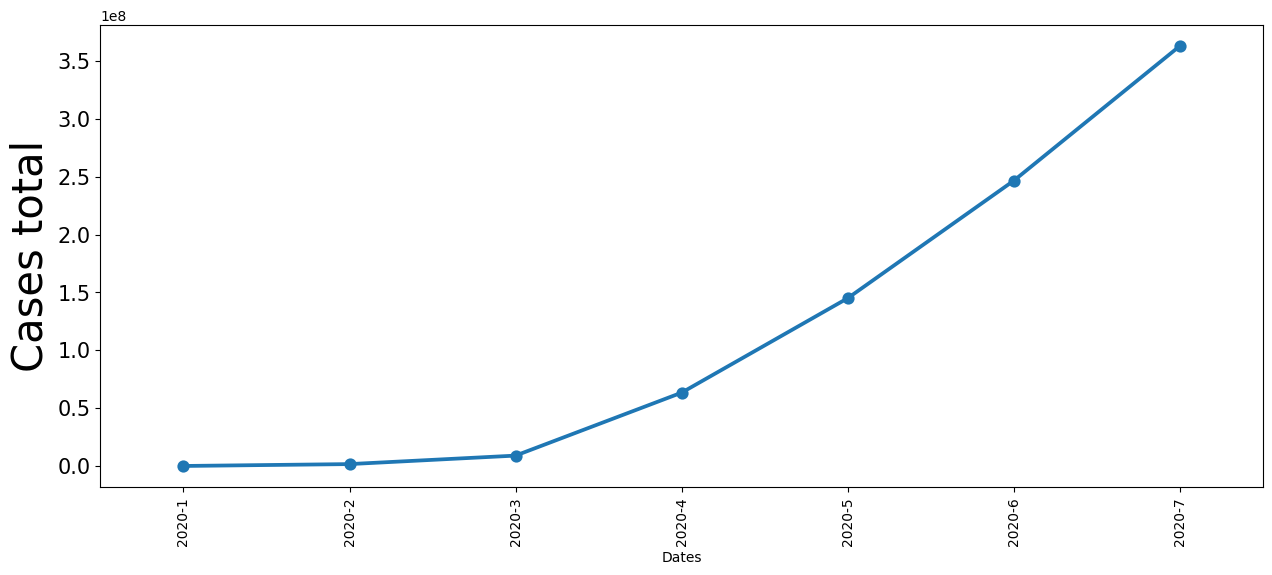

In [136]:
plt.figure(figsize=(15,6))
plot = sns.pointplot(data=month_wise,x='year_month',y='confirmed')
plot.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

<ipython-input-137-76f6e86215b3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_wise= data.groupby('WHO_Region')['confirmed','active','deaths','recovered'].sum().reset_index()


[Text(0.5, 0, 'Region'), Text(0, 0.5, 'Confirmed_Case')]

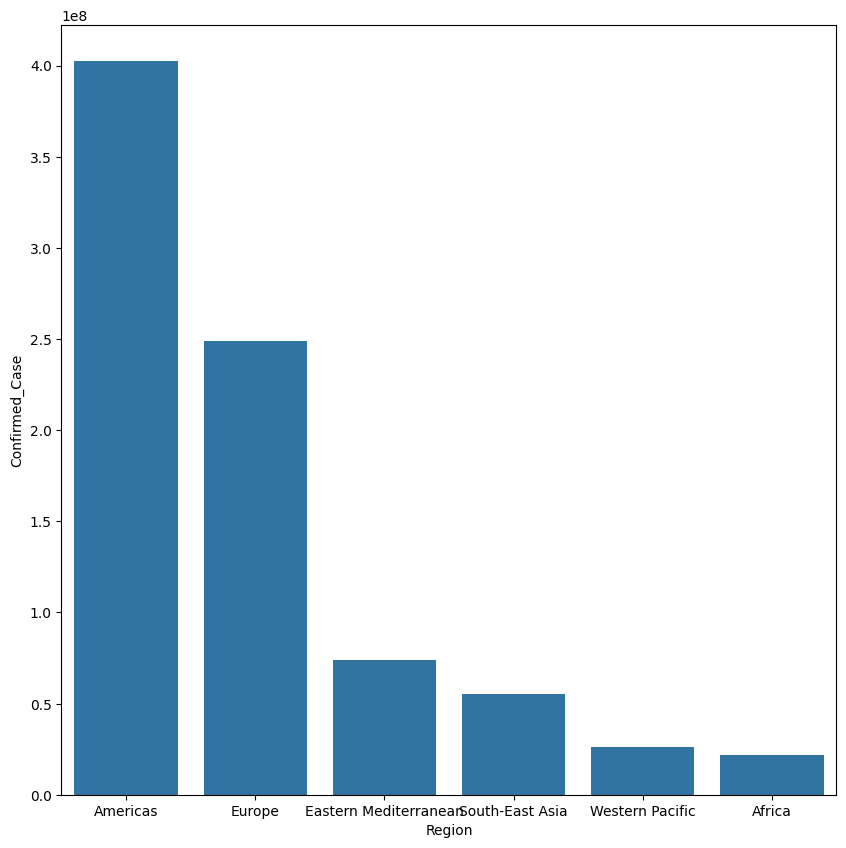

In [137]:
region_wise= data.groupby('WHO_Region')['confirmed','active','deaths','recovered'].sum().reset_index()
plt.figure(figsize=(10,10))
plot = sns.barplot(data=region_wise,x='WHO_Region',y='confirmed',order=region_wise.sort_values(by=['confirmed'],ascending=False).WHO_Region)
plot.set(xlabel='Region',ylabel='Confirmed_Case')



In [138]:
top_10country=recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().sort_values(by=['active'],ascending=False).head(10).reset_index()
top_10country

<ipython-input-138-170ee8f2bf9f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10country=recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().sort_values(by=['active'],ascending=False).head(10).reset_index()


,country,confirmed,active,deaths,recovered
0,US,4290259,2816444,148011,1325804
1,Brazil,2442375,508116,87618,1846641
2,India,1480073,495499,33408,951166
3,United Kingdom,301708,254427,45844,1437
4,Russia,816680,201097,13334,602249
5,South Africa,452529,170537,7067,274925
6,Colombia,257101,117163,8777,131161
7,France,220352,108928,30212,81212
8,Canada,116458,107514,8944,0
9,Peru,389717,98752,18418,272547


Text(0, 0.5, 'Country')

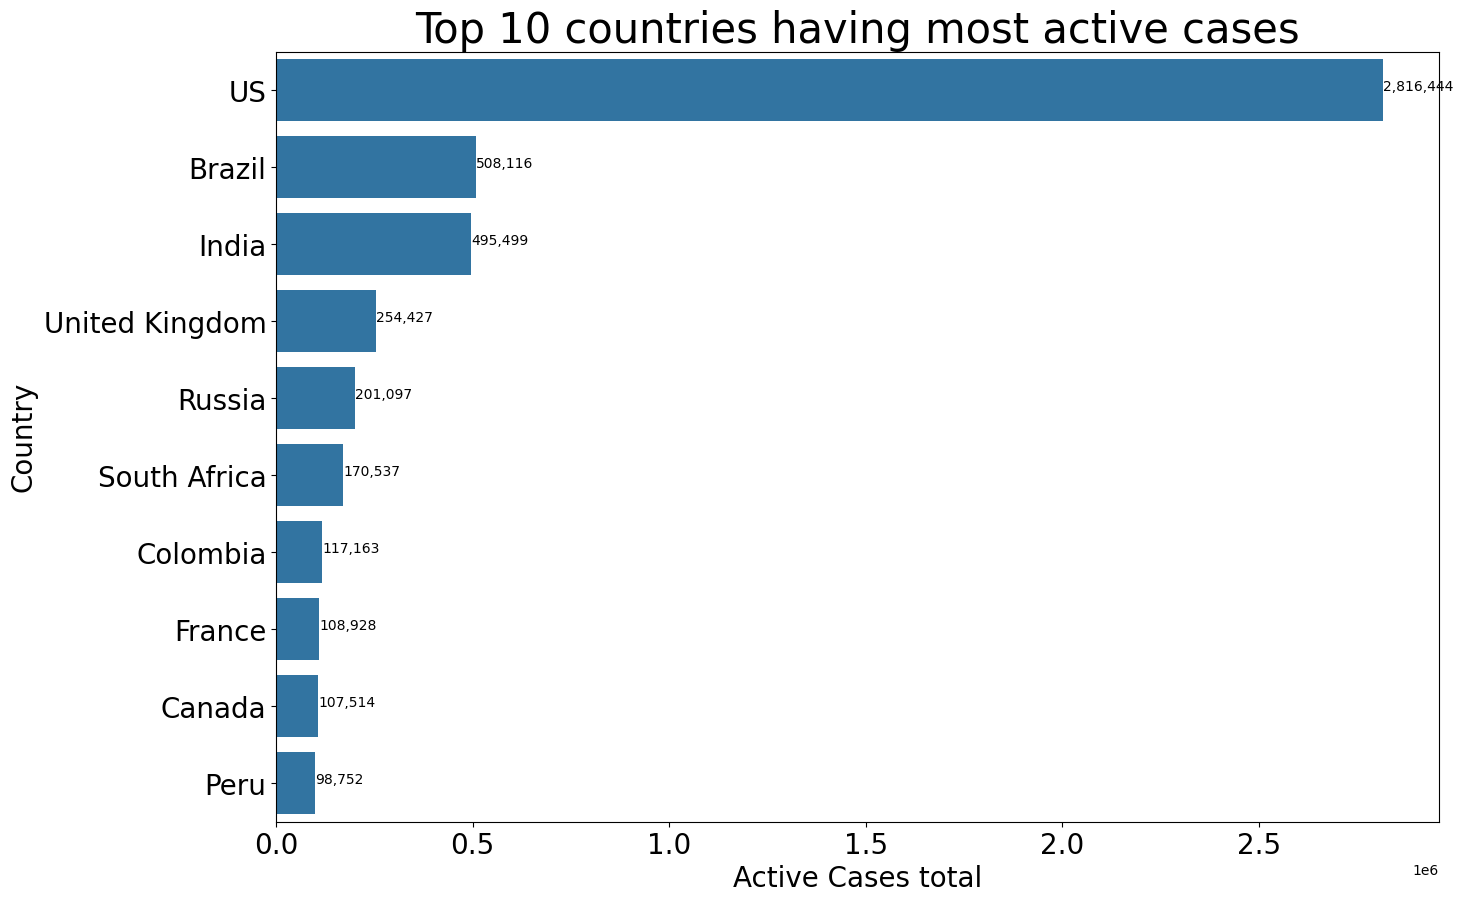

In [139]:
plt.figure(figsize=(15,10))
plt.title('Top 10 countries having most active cases',fontsize=30)
a=sns.barplot(x=top_10country.active,y=top_10country.country)
for i,(value,name) in enumerate(zip(top_10country.active,top_10country.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Active Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Active Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [140]:
top_10country=recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().sort_values(by=['deaths'],ascending=False).head(10).reset_index()
top_10country

<ipython-input-140-31abfdb6d2b7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10country=recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().sort_values(by=['deaths'],ascending=False).head(10).reset_index()


,country,confirmed,active,deaths,recovered
0,US,4290259,2816444,148011,1325804
1,Brazil,2442375,508116,87618,1846641
2,United Kingdom,301708,254427,45844,1437
3,Mexico,395489,47657,44022,303810
4,Italy,246286,12581,35112,198593
5,India,1480073,495499,33408,951166
6,France,220352,108928,30212,81212
7,Spain,272421,93613,28432,150376
8,Peru,389717,98752,18418,272547
9,Iran,293606,22550,15912,255144


Text(0, 0.5, 'Country')

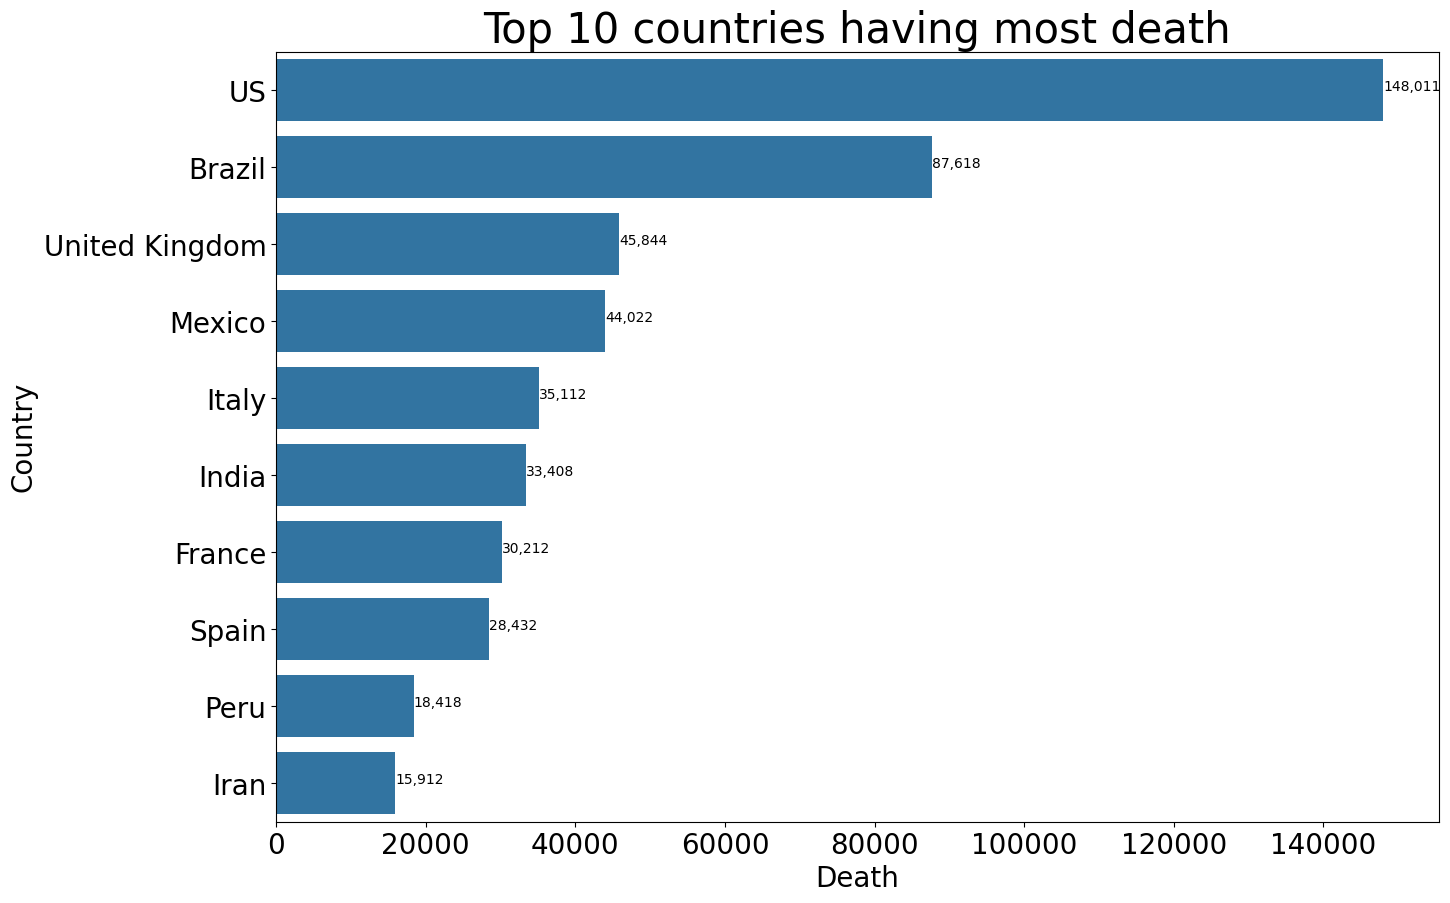

In [141]:
plt.figure(figsize=(15,10))
plt.title('Top 10 countries having most death',fontsize=30)
a=sns.barplot(x=top_10country.deaths,y=top_10country.country)
for i,(value,name) in enumerate(zip(top_10country.deaths,top_10country.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Death',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Death',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [142]:
top_10country=recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().sort_values(by=['recovered'],ascending=False).head(10).reset_index()
top_10country

<ipython-input-142-2970ac3dbfc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10country=recent_date.groupby('country')['confirmed','active','deaths','recovered'].sum().sort_values(by=['recovered'],ascending=False).head(10).reset_index()


,country,confirmed,active,deaths,recovered
0,Brazil,2442375,508116,87618,1846641
1,US,4290259,2816444,148011,1325804
2,India,1480073,495499,33408,951166
3,Russia,816680,201097,13334,602249
4,Chile,347923,18782,9187,319954
5,Mexico,395489,47657,44022,303810
6,South Africa,452529,170537,7067,274925
7,Peru,389717,98752,18418,272547
8,Iran,293606,22550,15912,255144
9,Pakistan,274289,27421,5842,241026


Text(0, 0.5, 'Country')

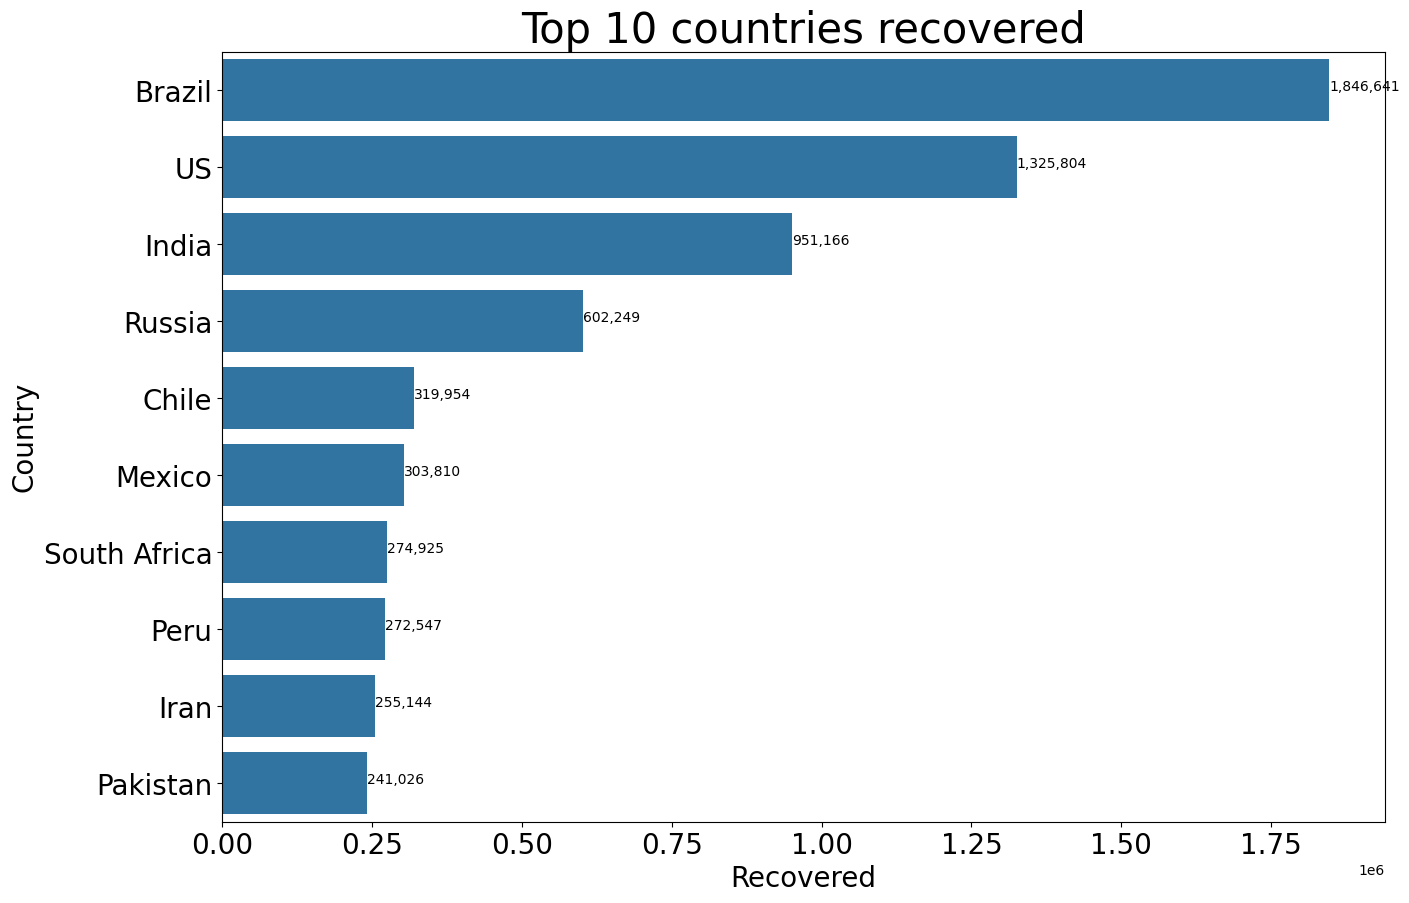

In [143]:
plt.figure(figsize=(15,10))
plt.title('Top 10 countries recovered',fontsize=30)
a=sns.barplot(x=top_10country.recovered,y=top_10country.country)
for i,(value,name) in enumerate(zip(top_10country.recovered,top_10country.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Recovered',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Recovered',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [144]:
India=data[data.country=='India']
India=India.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()

<ipython-input-144-d3a4fc888bce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  India=India.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()


In [145]:
India

,year_month,confirmed,active,recovered,deaths
0,2020-1,2,2,0,0
1,2020-2,84,42,42,0
2,2020-3,10252,9208,818,226
3,2020-4,447607,347379,85811,14417
4,2020-5,3088494,1777386,1216954,94154
5,2020-6,10951713,4703849,5916008,331856
6,2020-7,26385312,9150047,16564087,671178


(array([       0.,  2000000.,  4000000.,  6000000.,  8000000., 10000000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000000.0, '2'),
  Text(0, 4000000.0, '4'),
  Text(0, 6000000.0, '6'),
  Text(0, 8000000.0, '8'),
  Text(0, 10000000.0, '10')])

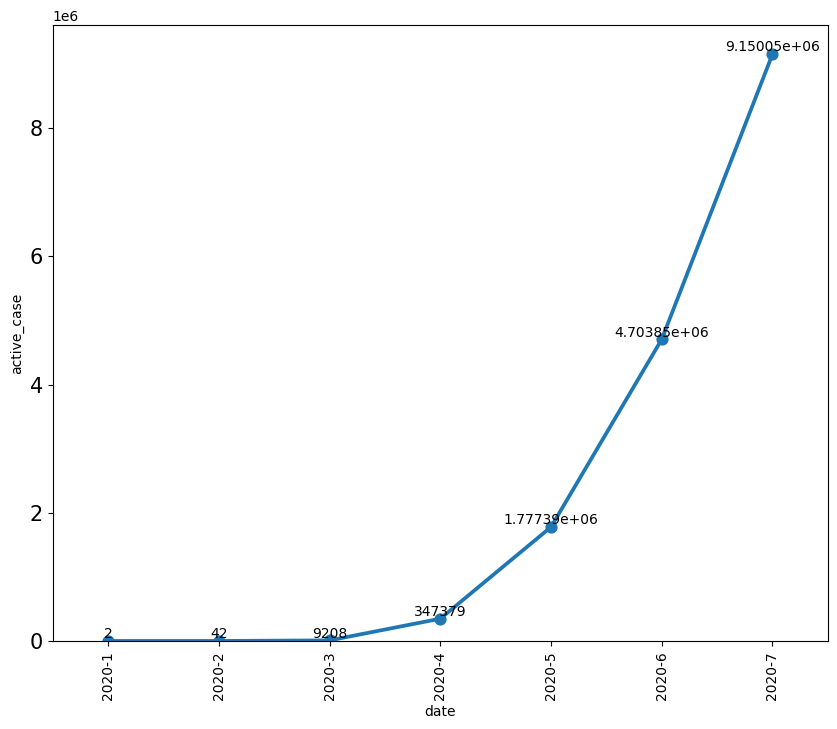

In [155]:
plt.figure(figsize=(10,8))
x=sns.pointplot(data=India,x='year_month',y='active')
bp = sns.barplot(data=India,x='year_month',y='active',alpha=0)
labels=x.bar_label(bp.containers[0])
x.set(xlabel='date',ylabel='active_case')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)

In [162]:
from collections import UserList
US=data[data.country=='US']
US=US.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()
US

<ipython-input-162-15f44178a2cc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  US=US.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()


,year_month,confirmed,active,recovered,deaths
0,2020-1,38,38,0,0
1,2020-2,378,289,88,1
2,2020-3,1091068,1045178,19730,26160
3,2020-4,19552582,16769592,1747977,1035013
4,2020-5,45407574,33958851,8720047,2728676
5,2020-6,64933835,43981001,17434297,3518537
6,2020-7,93360473,61226172,28431277,3703024


In [163]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()

<ipython-input-163-766377c3f0b6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Brazil=Brazil.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()


In [164]:
Russia=data[data.country=='Russia']
Russia=Russia.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()

<ipython-input-164-8e488423662b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Russia=Russia.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()


In [165]:
Chile=data[data.country=='Chile']
Chile=Chile.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()

<ipython-input-165-8ac62f5eb5e7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Chile=Chile.groupby(by='year_month')['confirmed','active','recovered','deaths'].sum().reset_index()


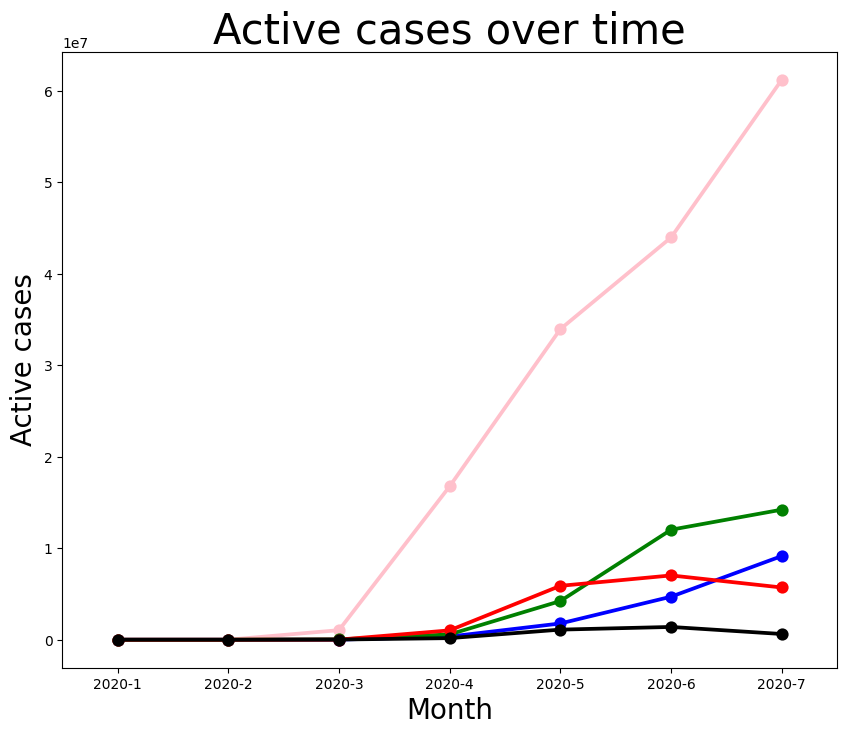

In [201]:
plt.figure(figsize=(10,8))
sns.pointplot(data=India,x='year_month',y='active',color="Blue")
sns.pointplot(data=US,x='year_month',y='active',color="Pink")
sns.pointplot(data=Brazil,x='year_month',y='active',color="Green")
sns.pointplot(data=Russia,x='year_month',y='active',color="Red")
sns.pointplot(data=Chile,x='year_month',y='active',color="Black")
plt.xlabel('Month',fontsize=20)
plt.ylabel('Active cases',fontsize=20)
plt.title('Active cases over time',fontsize=30)
plt.show()

In [178]:
figure= px.choropleth(country_wise,locations='country',locationmode='country names',
                      color='active',hover_name='country',range_color=[1,10000],
                      color_continuous_scale='reds',title='countries with active case')
figure.show()

In [181]:
figure= px.choropleth(country_wise,locations='country',locationmode='country names',
                      color='recovered',hover_name='country',range_color=[1,10000],
                      color_continuous_scale='greens',title='countries with recovered case')
figure.show()

In [182]:
figure= px.choropleth(country_wise,locations='country',locationmode='country names',
                      color='deaths',hover_name='country',range_color=[1,10000],
                      color_continuous_scale='plasma',title='countries with death case')
figure.show()

In [ ]:
# active case recent month in top 10 countries

In [186]:
active_top10 = recent_date.groupby('country')['active'].sum().sort_values(ascending=False).head(10).reset_index()

In [188]:
active_top10

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


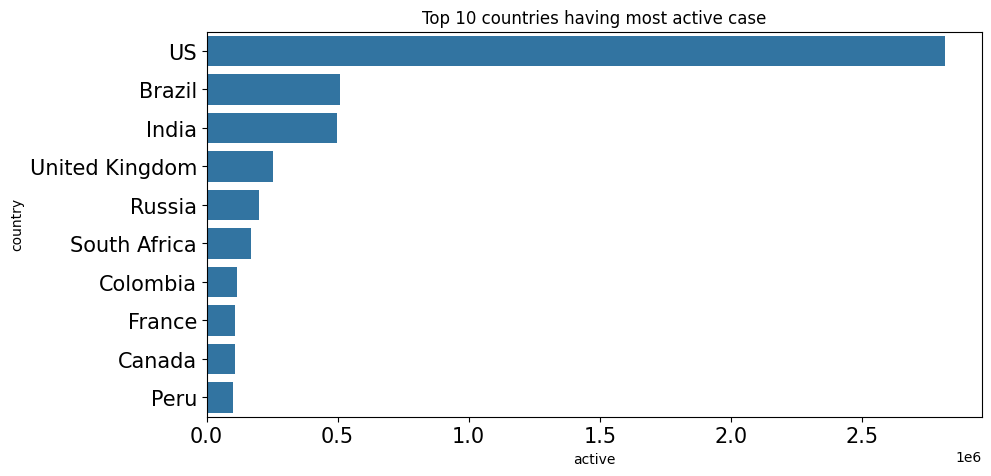

In [199]:
plt.figure(figsize=(10,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 countries having most active case")
ax= sns.barplot(x=active_top10.active,y=active_top10.country)

In [195]:
death_top10 = recent_date.groupby('country')['deaths'].sum().sort_values(ascending=False).head(10).reset_index()

In [196]:
death_top10

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


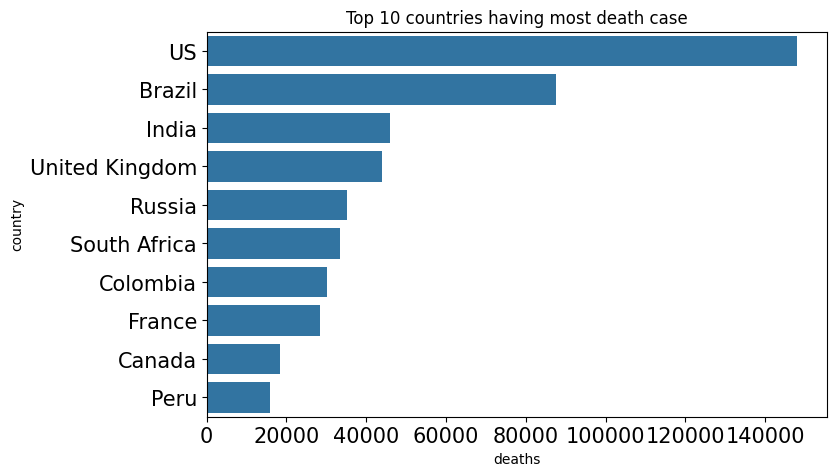

In [200]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 countries having most death case")
ax= sns.barplot(x=death_top10.deaths,y=active_top10.country)

**FORECASTING USING PROPHET(Time series model)**

1)There should be only two columns

2) Column name should always be 'ds'-->(date stamp) and 'y'-->(target)



---



In [202]:
! pip install prophet

In [203]:
from prophet import Prophet

In [204]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO_Region,month,year,year_month
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,1,2020,2020-1
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,1,2020,2020-1
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,1,2020,2020-1
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,1,2020,2020-1
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,1,2020,2020-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,7,2020,2020-7
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,7,2020,2020-7
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,7,2020,2020-7
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,7,2020,2020-7


In [205]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
active = data.groupby('date').sum()['active'].reset_index()

<ipython-input-205-368ef0a25854>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-205-368ef0a25854>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-205-368ef0a25854>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-205-368ef0a25854>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to Fal

In [206]:
confirmed.rename(columns={'date':'ds','confirmed':'y'},inplace=True)

In [207]:
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [208]:
model = Prophet(interval_width=0.95)
model.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_3fofvsq/ptkdthix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_3fofvsq/qsbv0ktn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93544', 'data', 'file=/tmp/tmp_3fofvsq/ptkdthix.json', 'init=/tmp/tmp_3fofvsq/qsbv0ktn.json', 'output', 'file=/tmp/tmp_3fofvsq/prophet_model4l7e7xa4/prophet_model-20240311100234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:02:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:02:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [209]:
future= model.make_future_dataframe(periods=7)

In [210]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [211]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [212]:
forecast=model.predict(future)

In [213]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.731175e+05,1.428908e+05,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.578860e+05,1.423405e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.563178e+05,1.708695e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-1.651466e+05,1.712725e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.444281e+05,1.660990e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.658292e+07,1.689202e+07,1.671162e+07,1.677166e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.679223e+07,1.712034e+07,1.689482e+07,1.698850e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.699764e+07,1.734882e+07,1.707894e+07,1.721128e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.720172e+07,1.755787e+07,1.725727e+07,1.743219e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [214]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.616354e+07,1.648140e+07
189,2020-07-29,1.652997e+07,1.636436e+07,1.667915e+07
190,2020-07-30,1.674391e+07,1.658292e+07,1.689202e+07
191,2020-07-31,1.695910e+07,1.679223e+07,1.712034e+07
192,2020-08-01,1.716676e+07,1.699764e+07,1.734882e+07
193,2020-08-02,1.736430e+07,1.720172e+07,1.755787e+07
194,2020-08-03,1.755889e+07,1.736472e+07,1.775003e+07


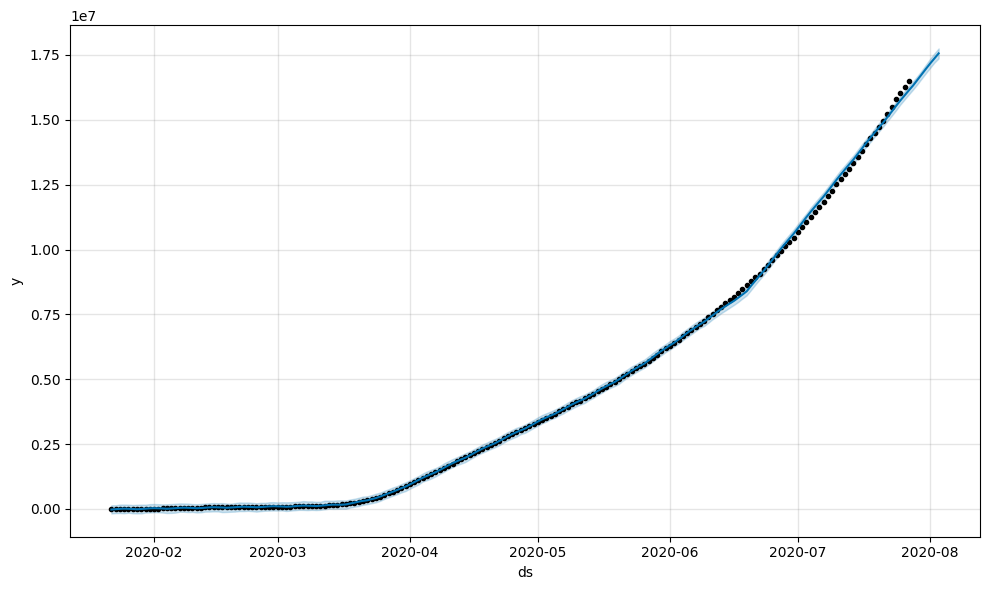

In [215]:
forcast_confirmed_plot=model.plot(forecast)

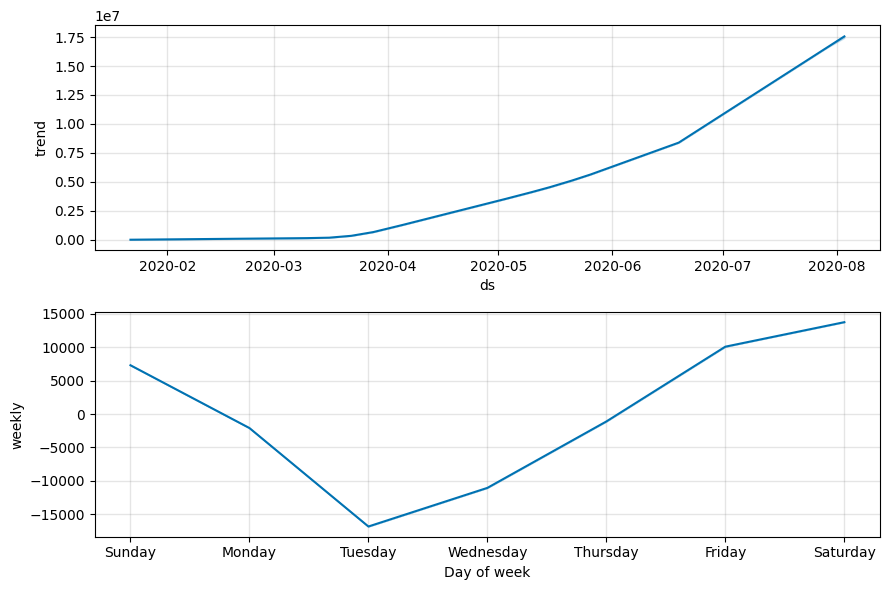

In [216]:
forcast_confirmed_plot1=model.plot_components(forecast)

In [217]:
deaths

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [218]:
deaths.rename(columns={'date':'ds','deaths':'y'},inplace=True)

In [219]:
deaths

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [220]:
model = Prophet(interval_width=0.95)
model.fit(deaths)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_3fofvsq/860ef0_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_3fofvsq/rx8_9ebn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75734', 'data', 'file=/tmp/tmp_3fofvsq/860ef0_s.json', 'init=/tmp/tmp_3fofvsq/rx8_9ebn.json', 'output', 'file=/tmp/tmp_3fofvsq/prophet_modeltt08hs_3/prophet_model-20240311102116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:21:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [221]:
future= model.make_future_dataframe(periods=7)

In [222]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [223]:
forecast=model.predict(future)

In [224]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-713.300051,-3723.786230,2186.918909
1,2020-01-23,-43.747057,-3051.715772,2777.380443
2,2020-01-24,531.538048,-2421.119644,3402.917953
3,2020-01-25,473.857138,-2647.138809,3667.923275
4,2020-01-26,-328.938355,-3284.355244,2449.625671
...,...,...,...,...
190,2020-07-30,663491.395651,660341.276015,666924.680103
191,2020-07-31,669006.394312,665557.912104,672703.840204
192,2020-08-01,673888.426957,669993.312492,677537.831694
193,2020-08-02,678025.345020,673438.592887,682291.662043


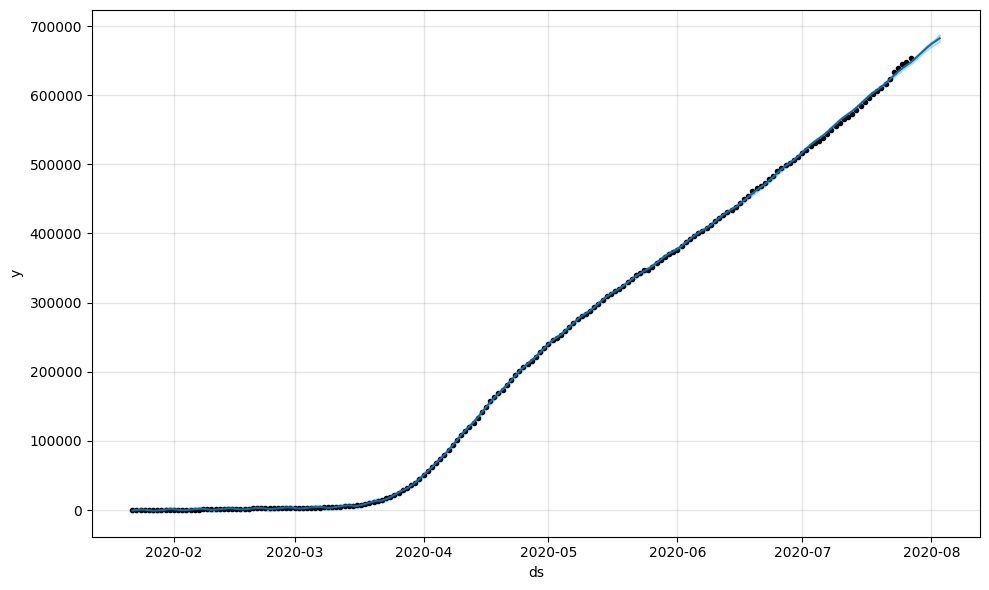

In [225]:
forcast_deaths_plot=model.plot(forecast)

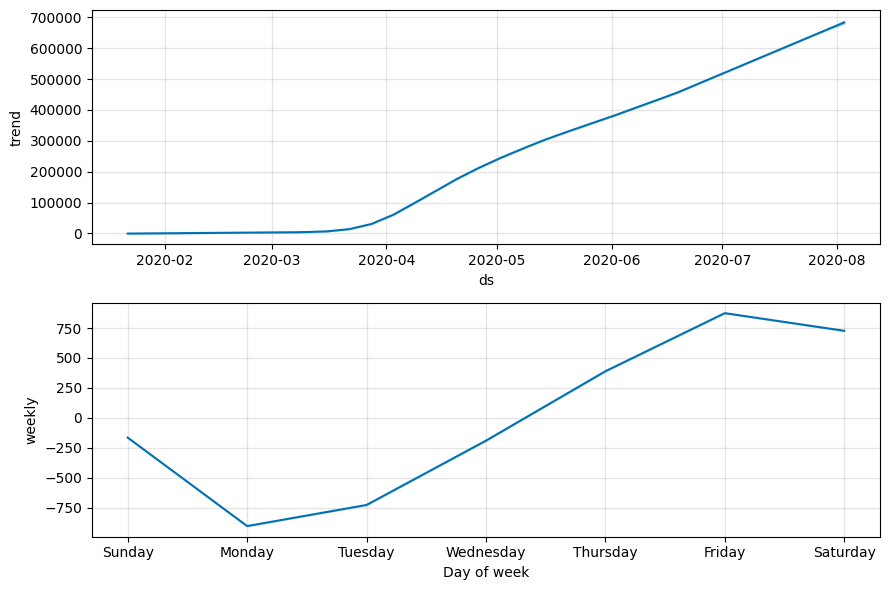

In [226]:
forcast_deaths_plot1=model.plot_components(forecast)